In [1]:
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_VISIBLE_DEVICES=''


In [2]:
import numpy as np
import cv2

In [3]:
img = cv2.imread('resized_image.jpg')

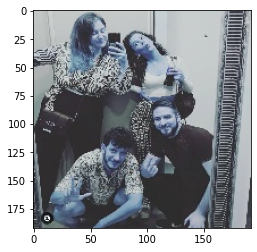

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img)